In [53]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ekoverianto/air-passengers/master/AirPassengers.csv')

df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


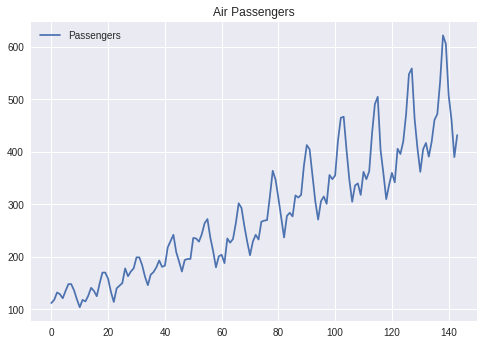

In [54]:
import matplotlib.pyplot as plt

plt.plot(df.iloc[:, -1], label="Passengers")
plt.title("Air Passengers")
plt.legend()
plt.show()

In [55]:
from numpy import square, sqrt

normalize_vector = list(map(lambda x: x / sqrt(sum(square(df.iloc[:, -1].values))), df.iloc[:, -1].values))

normalize_vector[:12]

[0.03062838584917973,
 0.03226919223395722,
 0.03609774046510468,
 0.03527733727271594,
 0.03308959542634596,
 0.03691814365749342,
 0.04047322415784464,
 0.04047322415784464,
 0.03719161138828967,
 0.03254265996475346,
 0.02844064400280975,
 0.03226919223395722]

In [0]:
train = normalize_vector[0:120]
test = normalize_vector[120:144]
window_size = 5

def get_features(v):
  features = []
  for i in range(len(v) - window_size):
    x = []
    for j in range(window_size):
      x.append(v[i + j])
    features.append(x)
  return features

train_features = get_features(train)
train_fact = train[window_size:]

test_features = get_features(test)
test_fact = test[window_size:]

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

regressor = MLPRegressor(random_state=100)

regressor.fit(train_features, train_fact)

pred_Train = regressor.predict(train_features)

mean_absolute_error(train_fact, pred_Train)

0.014105956192845888

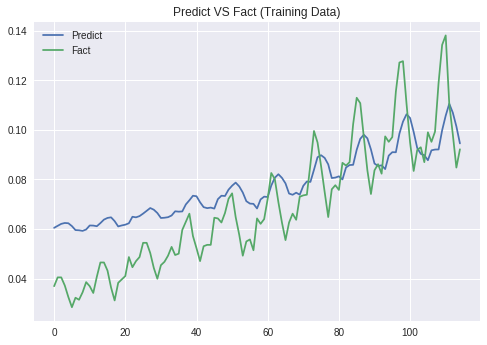

In [58]:
plt.plot(pred_Train, label="Predict")
plt.plot(train_fact, label="Fact")
plt.title("Predict VS Fact (Training Data)")
plt.legend()
plt.show()

In [59]:
pred_Test = regressor.predict(test_features)

mean_absolute_error(test_fact, pred_Test)

0.021304392003638147

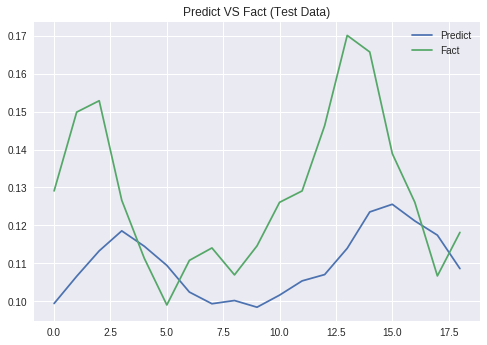

In [60]:
plt.plot(pred_Test, label="Predict")
plt.plot(test_fact, label="Fact")
plt.title("Predict VS Fact (Test Data)")
plt.legend()
plt.show()